<a href="https://colab.research.google.com/github/wanderam/py-scripts/blob/main/pandas/pandas_interpolate_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dados

dados = {'Data': ['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10'],
         'Temperatura': [25, 28, np.nan, 32, 33, np.nan, 39, 44, np.nan, 34]}    # [25, 28, np.nan, 32, 33, 36, 39, 44, 35, 34]

df = pd.DataFrame(dados)

df['Data'] = pd.to_datetime(df['Data'])

df

,Data,Temperatura
0,2000-01-01,25.0
1,2000-01-02,28.0
2,2000-01-03,NaN
3,2000-01-04,32.0
4,2000-01-05,33.0
5,2000-01-06,NaN
6,2000-01-07,39.0
7,2000-01-08,44.0
8,2000-01-09,NaN
9,2000-01-10,34.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         10 non-null     datetime64[ns]
 1   Temperatura  7 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 292.0 bytes


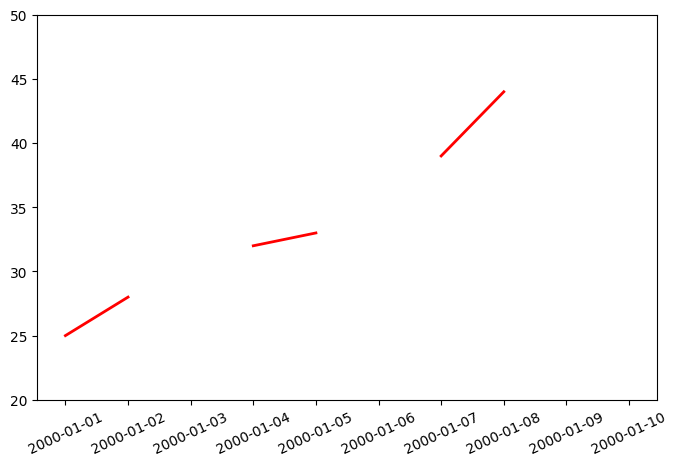

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(df['Data'], df['Temperatura'], color='r', lw=2.0, label='Temp. original')
plt.ylim(20, 50)
plt.xticks(rotation=25)

plt.show()

In [4]:
#Applying interpolation

df_linear = df.interpolate(method='linear')

df_time = df.set_index('Data').interpolate(method='time')

df_poly = df.set_index('Data').interpolate(method='polynomial', order=5)

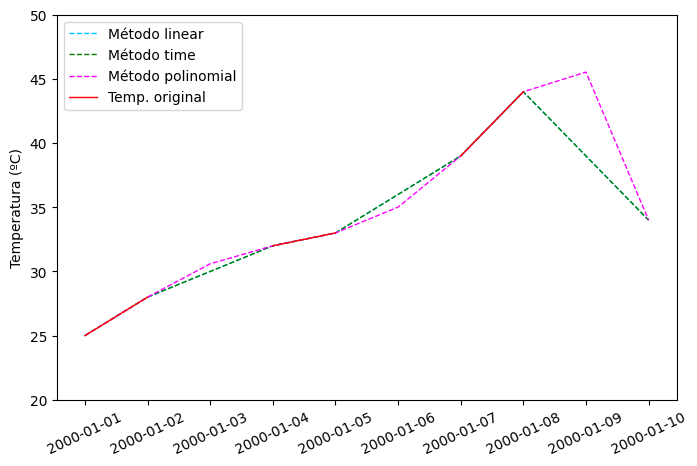

In [10]:
plt.figure(figsize=(8, 5))

plt.plot(df_linear['Data'], df_linear['Temperatura'], color='deepskyblue', lw=1.0, ls='--', label='Método linear')
plt.plot(df_time.index, df_time['Temperatura'], color='green', lw=1.0, ls='--', label='Método time')
plt.plot(df_poly.index, df_poly['Temperatura'], color='magenta', lw=1.0, ls='--', label='Método polinomial')
#Dados originais
plt.plot(df['Data'], df['Temperatura'], color='r', lw=1.0, label='Temp. original')

plt.legend()
plt.ylim(20, 50)
plt.ylabel('Temperatura (ºC)')
plt.xticks(rotation=25)


plt.show()

In [6]:
print(f'Dados originais:\n{df}')
print(f'\nDados método linear:\n{df_linear}')
print(f'\nDados método time:\n{df_time}')
print(f'\nDados método Polinomial:\n{df_poly}')

Dados originais:
        Data  Temperatura
0 2000-01-01         25.0
1 2000-01-02         28.0
2 2000-01-03          NaN
3 2000-01-04         32.0
4 2000-01-05         33.0
5 2000-01-06          NaN
6 2000-01-07         39.0
7 2000-01-08         44.0
8 2000-01-09          NaN
9 2000-01-10         34.0

Dados método linear:
        Data  Temperatura
0 2000-01-01         25.0
1 2000-01-02         28.0
2 2000-01-03         30.0
3 2000-01-04         32.0
4 2000-01-05         33.0
5 2000-01-06         36.0
6 2000-01-07         39.0
7 2000-01-08         44.0
8 2000-01-09         39.0
9 2000-01-10         34.0

Dados método time:
            Temperatura
Data                   
2000-01-01         25.0
2000-01-02         28.0
2000-01-03         30.0
2000-01-04         32.0
2000-01-05         33.0
2000-01-06         36.0
2000-01-07         39.0
2000-01-08         44.0
2000-01-09         39.0
2000-01-10         34.0

Dados método Polinomial:
            Temperatura
Data                   
2000-01